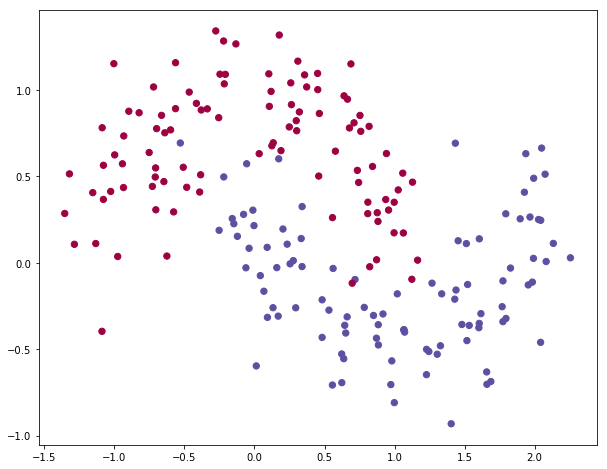

In [2]:
# Package imports
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import sklearn.datasets
import sklearn.linear_model
import matplotlib

# Display plots inline and change default figure size
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

# Generate a dataset and plot it
np.random.seed(0)
X, y = sklearn.datasets.make_moons(200, noise=0.20)
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)

In [3]:
# Train the logistic regression classifier
clf = sklearn.linear_model.LogisticRegressionCV()
clf.fit(X, y)

LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

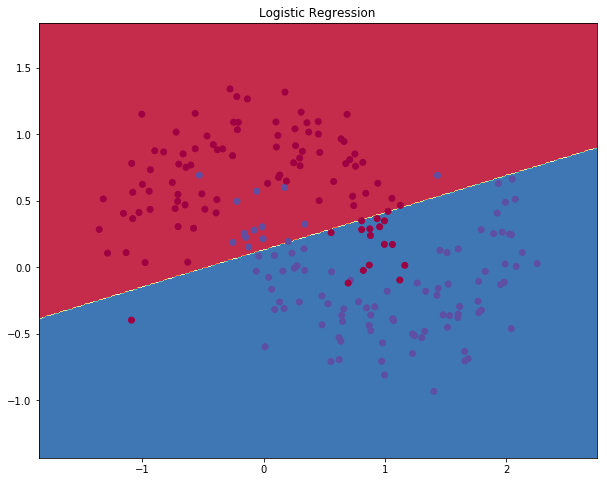

In [4]:
# Helper function to plot a decision boundary.
# If you don't fully understand this function don't worry, it just generates the contour plot below.
def plot_decision_boundary(pred_func):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

# Plot the decision boundary
plot_decision_boundary(lambda x: clf.predict(x))
plt.title("Logistic Regression")

Loss after iteration 0: 0.432387
Loss after iteration 1000: 0.068947
Loss after iteration 2000: 0.068945
Loss after iteration 3000: 0.071218
Loss after iteration 4000: 0.071253
Loss after iteration 5000: 0.071278
Loss after iteration 6000: 0.071293
Loss after iteration 7000: 0.071303
Loss after iteration 8000: 0.071308
Loss after iteration 9000: 0.071312
Loss after iteration 10000: 0.071314
Loss after iteration 11000: 0.071315
Loss after iteration 12000: 0.071315
Loss after iteration 13000: 0.071316
Loss after iteration 14000: 0.071316
Loss after iteration 15000: 0.071316
Loss after iteration 16000: 0.071316
Loss after iteration 17000: 0.071316
Loss after iteration 18000: 0.071316
Loss after iteration 19000: 0.071316


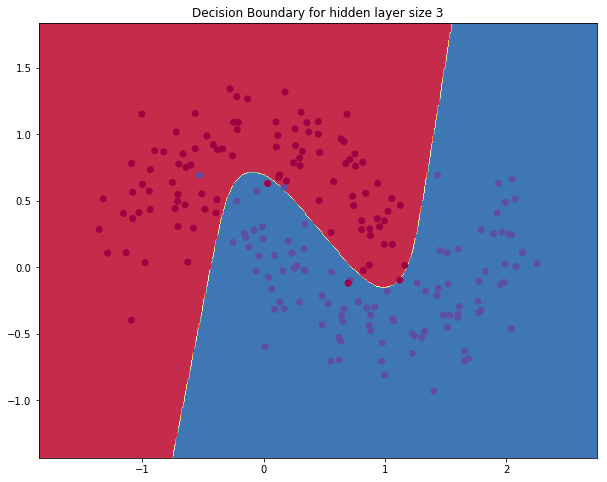

In [5]:
num_examples = len(X) # training set size
nn_input_dim = 2 # input layer dimensionality
nn_output_dim = 2 # output layer dimensionality
 
# Gradient descent parameters (I picked these by hand)
epsilon = 0.01 # learning rate for gradient descent
reg_lambda = 0.01 # regularization strength

# Helper function to evaluate the total loss on the dataset
def calculate_loss(model):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    # Forward propagation to calculate our predictions
    z1 = X.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    # Calculating the loss
    corect_logprobs = -np.log(probs[range(num_examples), y])
    data_loss = np.sum(corect_logprobs)
    # Add regulatization term to loss (optional)
    data_loss += reg_lambda/2 * (np.sum(np.square(W1)) + np.sum(np.square(W2)))
    return 1./num_examples * data_loss

# Helper function to predict an output (0 or 1)
def predict(model, x):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    # Forward propagation
    z1 = x.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    return np.argmax(probs, axis=1)

# This function learns parameters for the neural network and returns the model.
# - nn_hdim: Number of nodes in the hidden layer
# - num_passes: Number of passes through the training data for gradient descent
# - print_loss: If True, print the loss every 1000 iterations
def build_model(nn_hdim, num_passes=20000, print_loss=False):
     
    # Initialize the parameters to random values. We need to learn these.
    np.random.seed(0)
    W1 = np.random.randn(nn_input_dim, nn_hdim) / np.sqrt(nn_input_dim)
    b1 = np.zeros((1, nn_hdim))
    W2 = np.random.randn(nn_hdim, nn_output_dim) / np.sqrt(nn_hdim)
    b2 = np.zeros((1, nn_output_dim))
 
    # This is what we return at the end
    model = {}
     
    # Gradient descent. For each batch...
    for i in xrange(0, num_passes):
 
        # Forward propagation
        z1 = X.dot(W1) + b1
        a1 = np.tanh(z1)
        z2 = a1.dot(W2) + b2
        exp_scores = np.exp(z2)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
 
        # Backpropagation
        delta3 = probs
        delta3[range(num_examples), y] -= 1
        dW2 = (a1.T).dot(delta3)
        db2 = np.sum(delta3, axis=0, keepdims=True)
        delta2 = delta3.dot(W2.T) * (1 - np.power(a1, 2))
        dW1 = np.dot(X.T, delta2)
        db1 = np.sum(delta2, axis=0)
 
        # Add regularization terms (b1 and b2 don't have regularization terms)
        dW2 += reg_lambda * W2
        dW1 += reg_lambda * W1
 
        # Gradient descent parameter update
        W1 += -epsilon * dW1
        b1 += -epsilon * db1
        W2 += -epsilon * dW2
        b2 += -epsilon * db2
         
        # Assign new parameters to the model
        model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
         
        # Optionally print the loss.
        # This is expensive because it uses the whole dataset, so we don't want to do it too often.
        if print_loss and i % 1000 == 0:
          print "Loss after iteration %i: %f" %(i, calculate_loss(model))
     
    return model

# Build a model with a 3-dimensional hidden layer
model = build_model(3, print_loss=True)
 
# Plot the decision boundary
plot_decision_boundary(lambda x: predict(model, x))
plt.title("Decision Boundary for hidden layer size 3")

In [2]:
# logistic regression test
import math
import numpy as np

def sigmoid(scores): # 1 / ( 1 + exp(-y))
    return 1 / (1 + np.exp(-scores))

def log_likelihood(features, target, weights): # ll = y * beta * x - log( 1 + exp ( beta * x ))
    scores = np.dot(features, weights) # x * beta, features = x, weights = beta
    ll = np.sum( target*scores - np.log(1 + np.exp(scores)) ) # target = y
    return ll

def logistic_regression(features, target, num_steps, learning_rate, add_intercept = False):
    if add_intercept: # ones: Return a new array of given shape and type, filled with ones; intercept shifts linear expression
        intercept = np.ones((features.shape[0], 1)) # ??? shape: Return the shape of an array (rows, cols,...)
        features = np.hstack((intercept, features)) # ??? Stack arrays in sequence horizontally (column wise)
    weights = np.zeros(features.shape[1]) # initialize weights with 0
    for step in xrange(num_steps):
        scores = np.dot(features, weights) # x * beta, features = x, weights = beta
        predictions = sigmoid(scores)
        # Update weights with gradient
        output_error_signal = target - predictions # how far are we from the truth?
        gradient = np.dot(features.T, output_error_signal) # dll = x * error
        weights += learning_rate * gradient # update weights
        # Print log-likelihood every so often
        if step % 1000 == 0:
            print log_likelihood(features, target, weights)
    return weights

if __name__=="__main__":
    #print np.array( [ [ i*j for j in xrange(5)] for i in xrange(5)] )
    np.random.seed(12)
    num_observations = 5000

    x1 = np.random.multivariate_normal([0, 0], [[1, .75],[.75, 1]], num_observations)
    x2 = np.random.multivariate_normal([1, 4], [[1, .75],[.75, 1]], num_observations)

    simulated_separableish_features = np.vstack((x1, x2)).astype(np.float32)
    simulated_labels = np.hstack((np.zeros(num_observations),
                                  np.ones(num_observations)))
    weights = logistic_regression(simulated_separableish_features, simulated_labels,
                     num_steps = 10000, learning_rate = 5e-4, add_intercept=True) # was 300000 steps

-12586.2076795
-148.593278466
-142.94147575
-141.537733069
-141.05741414
-140.869097596
-140.789721704
-140.75480544
-140.739031488
-140.73178159


In [45]:
# logistic regression test 2
import math
import numpy as np

def sigmoid(scores): # 1 / ( 1 + exp(-y))
    return 1 / (1 + np.exp(-scores))

def log_likelihood(features, target, weights): # ll = y * beta * x - log( 1 + exp ( beta * x ))
    scores = np.dot(features, weights) # x * beta, features = x, weights = beta
    ll = np.sum( target*scores - np.log(1 + np.exp(scores)) ) # target = y
    return ll

def logistic_regression(features, target, num_steps, learning_rate, add_intercept = False):
    # intercept is x1
    if add_intercept: # ones: Return a new array of given shape and type, filled with ones; intercept shifts linear expression
        intercept = np.ones((features.shape[0], 1)) # ??? shape: Return the shape of an array (rows, cols,...)
        features = np.hstack((intercept, features)) # ??? Stack arrays in sequence horizontally (column wise)
    weights = np.zeros(features.shape[1]) # initialize weights with 0
    for step in xrange(num_steps):
        scores = np.dot(features, weights) # x * beta, features = x, weights = beta
        predictions = sigmoid(scores)
        # Update weights with gradient
        output_error_signal = target - predictions # how far are we from the truth?
        #print features.T
        #print output_error_signal
        gradient = np.dot(features.T, output_error_signal) # dll = x * error
        #print gradient
        weights += learning_rate * gradient # update weights
        # Print log-likelihood every so often
        if step % 20 == 0:
            print log_likelihood(features, target, weights)
    return weights

if __name__=="__main__":
    np.random.seed(12)
    num_observations = 2
    # draw rand. smpls frm multivar. norm. distribution: mean, cov, num_obs
    #x1 = np.random.multivariate_normal([0, 0], [[1, .75],[.75, 1]], num_observations) 
    #x2 = np.random.multivariate_normal([1, 4], [[1, .75],[.75, 1]], num_observations)
    #print x1
    #print x2
    #simulated_sep_features = np.vstack((x1, x2)).astype(np.float32) # stack data into one dataset
    # two separable point clouds
    simulated_sep_features = np.array([[-0.5, -0.5], [ 0.5, 0.8 ], [-0.8, 1.0], [ 0.8, 0.2 ]])
    #print simulated_sep_features
    simulated_labels = np.hstack((np.zeros(num_observations),
                                  np.ones(num_observations)))
    #print simulated_labels
    # weights determine the logistics line: without intercept just x and y of slope x/y
    weights = logistic_regression(simulated_sep_features, simulated_labels,
                     num_steps = 100, learning_rate = 5e-1, add_intercept=False) # was 300000 steps
    print weights

-2.68353238933
-2.55641739789
-2.55640403326
-2.55640403032
-2.55640403032
[-0.02773343  0.99137727]


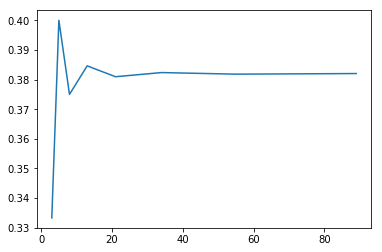

In [30]:
# a polynomial fit of Fibonacci numbers
import math
import numpy as np
import matplotlib.pyplot as plt

def fib(n): # nth fibonacci
    if n <= 2:
        return 1
    f0 = 1
    f1 = 1
    for k in range(3,n+1):
        f2 = f0 + f1
        f0 = f1
        f1 = f2
    return f2

def pfitfib(n): # fit a polynomial to Fibonaccis up to n-1 to estimate nth
    x = range(1,n)
    y = [fib(k) for k in x]
    return np.polyfit(x, y, n-2)

def evalpfit(n): # evaluate polynomial fit
    pfit = pfitfib(n)
    psum = 0.
    k = n-2
    for a in pfit:
        psum += n ** k * a
        k -= 1
    return psum

def limeff(n): # limit of |estd Fn - Fn| / Fn
    f = fib(n)
    return abs(evalpfit(n) - f) / f

if __name__=="__main__":
    #print limeff(12)
    x = [fib(n) for n in range(4,12)]
    y = [limeff(n) for n in range(4,12)]
    _ = plt.plot(x, y, '-')
    plt.show()

In [7]:
# 3 projections are circles - max volume
import math

def vzyl(x,y,z): # zylinder from three sides
    if y*y+z*z<=1. and x*x+z*z<=1. and x*x+y*y<=1.:
        return True
    return False

if __name__=="__main__":
    irange = 500
    ds = 2./(2. * irange)
    vsum = 0.
    for ix in range(-irange,irange):
        for iy in range(-irange,irange):
            for iz in range(-irange,irange):
                if vzyl( ix*ds, iy*ds, iz*ds ):
                    vsum += 1.
    vsum *= ds ** 3
    print vsum

4.68621832


In [5]:
# 2 runners
import math
import random

def fintime(l,u): # finish race in seconds
    return random.uniform(l,u)

if __name__=="__main__":
    awins = 0.
    ntrials = 10000
    for i in range(ntrials):
        atime = fintime(10., 12.)
        btime = fintime(11., 13.)
        if atime < btime:
            awins += 1
    print awins/ntrials

0.8716


In [13]:
# height of a fractal tree
import math

def sumh(n, l): # sum of heights
    sh = 0.
    for i in range(n):
        if i % 2 == 0:
            sh += 1. / (3. ** i)
        else:
            sh += math.cos(1.0472) / (3. ** i)
    return sh * l

if __name__=="__main__":
    print sumh(100, 32.)

41.9999745513


In [24]:
# unique numbers for students
import math

def mmult(a, b, k, l): # a**k * b**l
    return a**k * b**l

def nexta(a, b): # next a = a * b
    return a*b

if __name__=="__main__":
    a = 2
    b = 3
    out = [a, b]
    nxtout = []
    for n in range(5):
        for k in range(len(out)):
            if k == 0 or k == len(out)-1:
                nxtout.append(out[k])
            else:
                if (k-1) == 0:
                    nxtout.append(nexta(out[k-1], out[k]))
                nxtout.append(nexta(out[k], out[k+1]))
            if n == 0 and k < len(out)-1:
                nxtout.append(nexta(out[k-1], out[k]))
        print('{0}'.format(nxtout))
        out = [e for e in nxtout]
        nxtout = []

[2, 6, 3]
[2, 12, 18, 3]
[2, 24, 216, 54, 3]
[2, 48, 5184, 11664, 162, 3]
[2, 96, 248832, 60466176, 1889568, 486, 3]


In [34]:
# swim or walk
import math

def trvltime(vw, x, y): # travel time
    return ( 3./5.*(60.*vw - x - y) + math.sqrt(49.*vw*vw+x*x) + math.sqrt(324.*vw*vw+y*y)) / vw

if __name__=="__main__":
    vw = 1.
    x = 0.
    y = 0.
    ct = 1000.
    tmax = 1000.
    for ix in range(100):
        x = 4.5 + ix * 0.08
        for iy in range(30):
            y = 60.*vw - x - iy * 0.3 - 35.
            ct = trvltime(vw, x, y)
            if ct < tmax:
                print('min at x:{0} , y:{1} with t={2}'.format(x, y, ct))
                tmax = ct
    #print trvltime(1., -0.783445, 60.783445)

min at x:4.5 , y:20.5 with t=56.60260422
min at x:4.5 , y:20.2 with t=56.5578962167
min at x:4.5 , y:19.9 with t=56.5146605569
min at x:4.5 , y:19.6 with t=56.4729342941
min at x:4.5 , y:19.3 with t=56.4327554722
min at x:4.5 , y:19.0 with t=56.3941631452
min at x:4.5 , y:18.7 with t=56.3571973965
min at x:4.5 , y:18.4 with t=56.3218993577
min at x:4.5 , y:18.1 with t=56.2883112264
min at x:4.5 , y:17.8 with t=56.2564762837
min at x:4.5 , y:17.5 with t=56.2264389098
min at x:4.5 , y:17.2 with t=56.1982445999
min at x:4.5 , y:16.9 with t=56.1719399774
min at x:4.5 , y:16.6 with t=56.1475728068
min at x:4.5 , y:16.3 with t=56.1251920041
min at x:4.5 , y:16.0 with t=56.1048476461
min at x:4.5 , y:15.7 with t=56.0865909775
min at x:4.5 , y:15.4 with t=56.0704744151
min at x:4.5 , y:15.1 with t=56.0565515507
min at x:4.5 , y:14.8 with t=56.0448771504
min at x:4.5 , y:14.5 with t=56.0355071512
min at x:4.5 , y:14.2 with t=56.0284986546
min at x:4.5 , y:13.9 with t=56.0239099162
min at x:4.5 

In [11]:
# average areas of squares
import math
import random

def area(l,w,d): # area with variation
    return random.uniform(l,l+d) * random.uniform(w,w+d)

if __name__=="__main__":
    asum = 0.
    ntrials = 10000
    for i in range(ntrials):
        asum += area(1., 1., 0.1)
    print asum/ntrials

1.10188277551


In [29]:
# stacked circles
import math

def txy(x,y): # total of stacked circles: x: top row, y: base row
    return (y+1)*(y)/2 - (x-1)*(x)/2

if __name__=="__main__":
    #print txy(3,6)
    candidates = range(10000,20001)
    for x in range(1, 10000): # 18, 298
        for y in range(x+1, 10000): # 142,345
            atxy = txy(x,y)
            if atxy < 20001 and atxy > 9999:
                if atxy in candidates:
                    candidates.remove(atxy)
    #print len(candidates)
    print candidates

[16384]


In [45]:
# minimum lcm(a,b,c,d) with a+b+c+d=1000
import fractions
import functools
import itertools
import operator

def is_prime(n):
    for i in range(3, n):
        if n % i == 0:
            return False
    return True

def prime_generator(n):
    """
    Sieve of Eratosthenes
    Create a candidate list within which non-primes will be
    marked as None.
    """    
    cand = [i for i in range(3, n + 1, 2)]
    end = int(n ** 0.5) // 2
    # Loop over candidates (cand), marking out each multiple.
    for i in range(end):
        if cand[i]:
            cand[cand[i] + i::cand[i]] = [None] * (
                (n // cand[i]) - (n // (2 * cand[i])) - 1)
    # Filter out non-primes and return the list.
    return [2] + [i for i in cand if i]

primes_list = prime_generator(1000)

def factorize(n):
    prime_multiples = []
    for item in primes_list:
        if item > n:
            break
        else:
            while n > 1:
                if n % item == 0:
                    n //= item
                    prime_multiples.append(item)
                else:
                    break
    return prime_multiples

def calculate_divisors(n):
    prime_multiples_list = factorize(n)
    """
    construct unique combinations
    A, B, B, C --> A, B, C, AB, AC, BB, BC, ABC, ABB, BBC
    """
    unique_combinations = set()
    for i in range(1, len(prime_multiples_list)):
        unique_combinations.update(
            set(itertools.combinations(prime_multiples_list, i)))
    # multiply elements of each unique combination
    combination_product = list(functools.reduce(operator.mul, i)
                               for i in unique_combinations)
    combination_product.sort()
    return combination_product

def lcm(a,b):
    return abs(a * b) / fractions.gcd(a,b) if a and b else 0

def lcmarr(arr):
    lcm = arr[0]
    for i in arr[1:]:
        lcm = lcm*i / fractions.gcd(lcm, i) if lcm and i else 0
    return lcm

# function to find GCD of pair with max GCD in the array
def findMaxGCD(arr, n) :
    # Calculating MAX in array
    high = 0
    for i in range(0, n) :
        high = max(high, arr[i])
 
    # Maintaining count array
    count = [0] * (high + 1)
    for i in range(0, n) :
        count[arr[i]] = 1
 
    # Variable to store multiples of a number
    counter = 0
 
    # Iterating from MAX to 1 GCD is always between MAX and 1
    # The first GCD found will be the highest as we are decrementing the potential GCD
    for i in range(high, 0, -1) :
        j = i
 
        # Iterating from current potential GCD till it is less than MAX
        while (j <= high) :
 
            # A multiple found
            if (count[j] == 1) :
                counter = counter + 1       
 
            # Incrementing potential GCD by itself to check i, 2i, 3i....
            j = j + i
 
            # 2 multiples found, max GCD found
            if (counter == 2) :
                return i

if __name__=="__main__":
    # Array in which pair with max GCD is to be found
    #arr = [ 1, 2, 4, 8, 8, 12 ]
    # Size of array
    #n = len(arr)
    #print(findMaxGCD(arr, n))
    
    # choose a,b,c from primes_list, d=1000-a-b-c
    lp = len(primes_list)
    minlcm = 1000
    for a in range(1, 990):
        #a = primes_list[i]
        #b = primes_list[i+1]
        #c = primes_list[i+2]
        for b in range(a+1,900):
            for c in range(b+1,900):
                d = 1000 - a - b - c
                lcma = [a,b,c,d]
                thislcm = lcmarr(lcma)
                if thislcm < minlcm and thislcm > 0:
                    print('a: {0} b: {1} c: {2} d: {3} : lcm: {4}'.format(a,b,c,d,thislcm))
                    #print('lcm a,b: {0}'.format(lcm(a,b)))
                    minlcm = thislcm

a: 1 b: 3 c: 6 d: 990 : lcm: 990
a: 1 b: 3 c: 12 d: 984 : lcm: 984
a: 1 b: 3 c: 249 d: 747 : lcm: 747
a: 1 b: 3 c: 498 d: 498 : lcm: 498
a: 1 b: 9 c: 495 d: 495 : lcm: 495
a: 1 b: 27 c: 486 d: 486 : lcm: 486
a: 1 b: 37 c: 481 d: 481 : lcm: 481
a: 1 b: 111 c: 444 d: 444 : lcm: 444
a: 6 b: 142 c: 426 d: 426 : lcm: 426
a: 20 b: 140 c: 420 d: 420 : lcm: 420


In [16]:
# domino sets
import math

def tn(d): # total sum of domino set d
    tsum = 0
    for i in range(0,len(d)):
        tsum += d[i][0] + d[i][1]
    return tsum

def pn(d): # total product of domino set d
    psum = 0
    for i in range(0,len(d)):
        psum += d[i][0] * d[i][1]
    return psum

def limntp(n,d):
    return float(n) * float(tn(d)) / float(pn(d))

def createdset(n): # create domino set of order n
    d = []
    for i in range(n+1):
        for j in range(i,n+1):
            d.append([i,j])
    return d

if __name__=="__main__":
    #for n in range(1,300):
        #d = createdset(n)
        #print d
        #print tn(d)
        #print pn(d)
        #print limntp(n,d)
    d = createdset(2000)
    print limntp(2000,d)

3.99933344443


In [21]:
# awesome integers
import math

def chckdig(a,b,c): # check all digits 0 to 9 used
    alldig = [x for x in range(10)]
    al = [int(x) for x in str(a)]
    bl = [int(x) for x in str(b)]
    cl = [int(x) for x in str(c)]
    for el in al:
        try:
            alldig.remove(el)
        except ValueError:
            return 1
    for el in bl:
        try:
            alldig.remove(el)
        except ValueError:
            return 1
    for el in cl:
        try:
            alldig.remove(el)
        except ValueError:
            return 1
    return len(alldig)

if __name__=="__main__":
    #print chckdig(36, 495, 17820)
    iasum = 0
    for ia in range(0, 190):
        for ib in range(0, 9900):
            ic = ia * ib
            if chckdig(ia, ib, ic) == 0:
                print('a: {0} b: {1} c: {2}'.format(ia, ib, ic))
                iasum += ia
    print iasum

a: 3 b: 5694 c: 17082
a: 3 b: 6819 c: 20457
a: 3 b: 6918 c: 20754
a: 3 b: 8169 c: 24507
a: 3 b: 9168 c: 27504
a: 4 b: 3907 c: 15628
a: 4 b: 7039 c: 28156
a: 4 b: 9127 c: 36508
a: 6 b: 5817 c: 34902
a: 7 b: 3094 c: 21658
a: 7 b: 4093 c: 28651
a: 7 b: 9304 c: 65128
a: 7 b: 9403 c: 65821
a: 27 b: 594 c: 16038
a: 36 b: 495 c: 17820
a: 39 b: 402 c: 15678
a: 45 b: 396 c: 17820
a: 46 b: 715 c: 32890
a: 52 b: 367 c: 19084
a: 54 b: 297 c: 16038
a: 63 b: 927 c: 58401
a: 78 b: 345 c: 26910
501


In [12]:
# an integral
import math

def abcterm(a,b,c): # evaluate term
    return math.pi / a + math.log(b) - math.atan(c)

if __name__=="__main__":
    #print abcterm(1, 1, 1)
    for a in range(1,8):
        for b in range(1,8):
            for c in range(1,8):
                term = abcterm(a, b, c)
                if abs(term - 1.93119) < 0.1:
                    print('a: {0} b: {1} c: {2} term: {3}'.format(a,b,c,abcterm(a, b, c)))

a: 1 b: 1 c: 3 term: 1.89254688119
a: 2 b: 3 c: 1 term: 1.88401045207
a: 2 b: 4 c: 2 term: 1.84994197012
a: 2 b: 5 c: 3 term: 1.93118846683
a: 2 b: 5 c: 4 term: 1.85441657556
a: 2 b: 6 c: 5 term: 1.98915502908
a: 2 b: 6 c: 6 term: 1.95690814664
a: 2 b: 6 c: 7 term: 1.93365652383
a: 3 b: 5 c: 1 term: 1.87123730023
a: 3 b: 7 c: 2 term: 1.88595898246
a: 4 b: 7 c: 1 term: 1.94591014906


In [22]:
# a neutrino
import math

def muimp(a,b,c,d,t): # muon impulse
    return math.sqrt( ( math.sqrt(d*d*math.acos(t)**2+a)-b ) ** 2 - c )

def epi(m,c):
    return math.sqrt( m ** 2 * c ** 2 + 140. )

if __name__=="__main__":
    d = 290 / 2.998 * 10**4
    #print muimp(140.0e+6, 290.0e+12, 106.0e+6, d, 0.1)
    for it in range(2,10):
        at = math.pi / 2. / it
        print('{0} : {1}'.format(at, muimp(140.0e+6, 290.0e+12, 106.0e+6, d, at)))
    print epi( muimp(140.0e+6, 290.0e+12, 106.0e+6, d, math.pi / 2. / 4. ), 2.998e+8) / 290.0e+12

0.785398163397 : 2.89999999354e+14
0.523598775598 : 2.89999999014e+14
0.392699081699 : 2.89999998871e+14
0.314159265359 : 2.8999999879e+14
0.261799387799 : 2.89999998737e+14
0.224399475256 : 2.89999998699e+14
0.196349540849 : 2.89999998672e+14
0.174532925199 : 2.8999999865e+14
299799998.833


In [30]:
# powers of 9
import math

def pow9two(n): # powers of nine two digits
    if n < 3:
        return 9 ** n
    else:
        print 9
        print 81
        pow9 = 81
        for i in range(n-2):
            pow9 *= 9
            s = str(pow9)
            print s
            if len(s) > 1:
                pow9s = s[-2] + s[-1]
            else:
                pow9s = '0' + s[-1]
            pow9 = int(pow9s)
        return pow9

if __name__=="__main__":
    print pow9two(25)

9
81
729
261
549
441
369
621
189
801
9
81
729
261
549
441
369
621
189
801
9
81
729
261
549
49


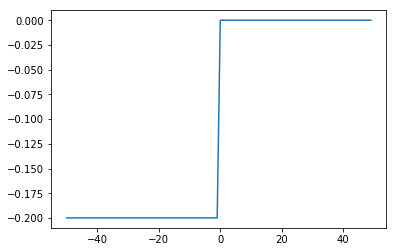

In [61]:
# sin sin sin ... x
import math
import matplotlib.pyplot as plt

def nsin(x,n): # nth application of sin
    a = x
    for k in range(n):
        a = math.sin(a)
    return a

def efit(n):
    #return 0.337993 + 1.3687 / math.exp(n)
    return 0.829436 - 0.153158 * math.log(n)

def deriv7(x,n,h): # 7th derivative
    a = -nsin(x,n)
    a += 7. * nsin(x+h,n)
    a += -21. * nsin(x+2.*h,n)
    a += 35. * nsin(x+3.*h,n)
    a += -35. * nsin(x+4.*h,n)
    a += 21. * nsin(x+5.*h,n)
    a += -7. * nsin(x+6.*h,n)
    a += 1. * nsin(x+7.*h,n)
    a /= h ** 7
    return a

if __name__=="__main__":
    #x = [n for n in range(1,70)]
    #y = [nsin(1.,n) for n in range(1,70)]
    #z = [efit(n) for n in range(1,70)]
    #_ = plt.plot(x, y, '-', z, '--')
    #plt.show()
    #df = nsin(0.001, 70) - nsin(-0.001, 70)
    #dx = 0.002
    #print df / dx
    #x0 = 0.
    #h0 = 0.0000000000001
    #d7 = ( deriv7(x0, 70, h0) + deriv7(x0, 70, -h0) ) / 2.
    #print d7
    x = [n for n in range(-50, 50)]
    y = [nsin(n / 100, 70) for n in range(-50, 50)]
    _ = plt.plot(x, y, '-')
    plt.show()

In [4]:
# notes and beats
import math

# note encoding: as length in 1/16ths: 16=1 full, 8=1/2,...
def rhythm(snote, rlen): # creates a rhythm with longest note snote for rlen in 16ths
    if snote <= 0 or rlen <= 0:
        return [0]
    if snote >= 16:
        return [16]
    if snote >= rlen:
        return [snote]
    rlen -= snote
    return [snote, rhythm(snote / 2, rlen)]
    
if __name__=="__main__":
    print rhythm(8, 16)

[8, [4, [2, [1, [0]]]]]


In [3]:
# integers that contain 0
import math

def count0(n): # count digit 0 up to n
    zctr = 0
    for i in range(1,n+1):
        s = str(i)
        if s.find('0') > 0:
            zctr += 1
    return zctr
    
if __name__=="__main__":
    print count0(1000)

181


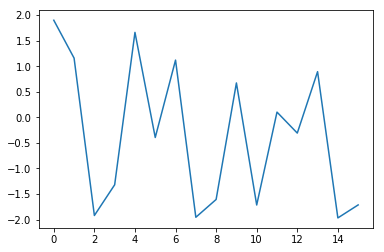

In [34]:
# iterative function
import math
import matplotlib.pyplot as plt

def func(x): # a function
    return x*x*x - 3.*x

def applyf(x, n): # apply function n times
    fval = x
    for i in range(0, n):
        fval = func(fval)
    return fval

if __name__=="__main__":
    #print applyf(-2., 16)
    x = [n for n in range(0, 16)]
    y = [applyf(1.9, n) for n in range(0, 16)]
    _ = plt.plot(x, y, '-')
    plt.show()

In [2]:
# quadrilaterals
import math

def qn(a): # new n of quadrilaterals for new layer
    retval = (a-1) * a / 2
    for k in range(1,a): # n=1 to a-1
        retval += (a-k) * (2*a-2*k+1) + 4 * (a-k) + 1
    return retval

def sumqn(a): # sum of quadrilaterals
    retval = 0
    for i in range(0, a+1):
        retval += qn(i)
    return retval

if __name__=="__main__":
    print sumqn(30)

162255


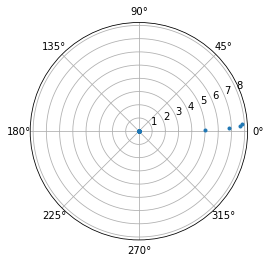

In [8]:
# ant with too little energy
import math
import random
import matplotlib.pyplot as plt

def norm(dx,dy): # normalize
    vlen = math.sqrt(dx*dx + dy*dy)
    return (dx/vlen, dy/vlen)

def ds(dx,dy,x,y): # energy lost in step ds (length 1)
    if abs(x) >= abs(y):
        return math.sqrt(1.+(dy/dx)**2) * (1.+0.4*abs(y))
    return math.sqrt(1.+(dy/dx)**2) * (1.+0.4*abs(x))

def rdwalk(): # random ant walk
    aenerg = 10.
    ns = 0
    x = 0
    y = 0
    while aenerg > 0. and ns < 50:
        dx = random.random()
        dy = random.random()
        vd = norm(dx, dy)
        x += vd[0]
        y += vd[1]
        aenerg -= ds(dx, dy, x, y)
        ns += 1
    return ( math.atan(y/x), math.sqrt(x*x + y*y) )

def thetarg(n): # a range of angles
    return [ ( math.pi / 4. * i / n ) for i in range(1,n)]

def nextthet(a): # find index of next theta angle in list
    if a > 0.:
        aind = int(math.floor(math.pi / 4. / a))
    else:
        aind = 1
    return aind

if __name__=="__main__":
    theta = []
    ntheta = 45
    theta = thetarg(ntheta+1)
    #r = []
    r = [0. for i in range(ntheta)]
    for i in range(20000):
        res = rdwalk()
        #theta.append(res[0])
        nt = min(ntheta-1, nextthet(res[0]))
        r[nt] = max(r[nt], res[1])
        #r.append(res[1])
    #print rdwalk()
    #print r
    _ = plt.polar(theta, r, '.')
    plt.show()

In [6]:
# ant with too little energy II
import math
import random
import matplotlib.pyplot as plt

def norm(dx,dy): # normalize
    vlen = math.sqrt(dx*dx + dy*dy)
    return (dx/vlen, dy/vlen)

def ds(x,y): # energy lost in step ds (length 1)
    if abs(x) >= abs(y):
        return (1.+0.4*abs(y))
    return (1.+0.4*abs(x))

def thetarg(n): # a range of angles
    return [ ( 2. * math.pi * i / n ) for i in range(1,n)]

def nextthet(a): # find index of next theta angle in list
    if a > 0.:
        aind = int(math.floor(2. * math.pi / a))
    else:
        aind = 0
    return aind

def aa(a):
    return math.sqrt(1.+math.tan(a)**2)/2.

def bb(a):
    return 2.*aa(a)*0.4*math.tan(a)/3.

def xx(a):
    aaa = aa(a)
    bbb = bb(a)
    print aaa
    print bbb
    print (135.*bbb*bbb*bbb*bbb-2.*aaa*aaa*aaa*bbb*bbb)
    ccc = (3.*math.sqrt(15.)*math.sqrt(135.*bbb*bbb*bbb*bbb-2.*aaa*aaa*aaa*bbb*bbb)+aaa**3.-135.*bbb*bbb) ** (1./3.)
    return (-ccc/bbb - aaa*aaa/bbb/ccc-aaa/bbb) / 3.

def x1(x0):
    return ( math.sqrt(5. * (45.-4.*x0)) + 2.*x0 - 5. ) / 2.
    #return 3.90717e-16 * ( 3.577e7 * math.sqrt(1.02376e16*x0*x0-1.80977e16*x0+2.12969e17)+2.5594e15*x0-6.3985e15)

if __name__=="__main__":
    x = []
    y = []
    nrg = 3000
    sx = 10. / nrg
    for i in range(nrg+1):
        x0 = 10. - i * sx
        xx1 = x1(x0)
        y1 = xx1 - x0
        #print('x0: {0} x1: {1} y1: {2}'.format(x0, xx1, y1))
        x.append(xx1)
        y.append(y1)
    #print x
    #print y
    asum = 0.
    for i in range(nrg):
        dx = x[i] - x[i+1]
        dy = y[i+1] - y[i]
        asum += dx * dy / 2. + y[i] * dx
    print asum*8.

134.666661679


In [26]:
# gcd of 2^72-1, 3^72-1,...
import fractions

def gcdpow(k): # gcd of powers 2^k-1, 3^k-1,...
    onegcd = fractions.gcd(2 ** k - 1, 3 ** k - 1)
    for p in range(4, k+1):
        a = p ** k - 1
        onegcd = fractions.gcd(onegcd, a)
    return onegcd

if __name__=="__main__":
    print gcdpow(72)

73


In [12]:
# integer solutions
import math

def x(k): # calc x
    a = (2018-2017*k)
    b = (2*k-3)
    if a % b == 0:
        return a / b
    else:
        return 0

if __name__=="__main__":
    for k in range (-10000000, 10000000):
        xx = x(k)
        if xx != 0:
            print xx

-1008
-1006
-1002
-993
-976
-931
-807
-1
-2016
-1210
-1086
-1041
-1024
-1015
-1011
-1009


In [44]:
# a parallelogram
import math

def a1(a, x): # calc a1
    return 2009. * x**2 / a**2

def a2(a, x): # calc a2
    return (a-x) * 2009. * x / a**2

def a3(a, x): # calc a3
    return (a-x) * 2009. / a * (1.-x/a)

if __name__=="__main__":
    a=45.
    x=5.
    for a in range(20,80):
        for x in range(1,10):
            aa1 = a1(float(a), float(x))
            aa2 = a2(float(a), float(x))
            aa3 = a3(float(a), float(x))
            if float(aa1).is_integer():
                print('a1: {0} a2: {1} a3: {2}'.format(aa1, aa2, aa3))
                #delta = (2009-aa1-2.*aa2-aa3)
                #print delta
                print aa2/aa1
                print aa3/aa2

a1: 41.0 a2: 246.0 a3: 1476.0
6.0
6.0
a1: 164.0 a2: 410.0 a3: 1025.0
2.5
2.5
a1: 369.0 a2: 492.0 a3: 656.0
1.33333333333
1.33333333333
a1: 41.0 a2: 246.0 a3: 1476.0
6.0
6.0
a1: 164.0 a2: 410.0 a3: 1025.0
2.5
2.5
a1: 41.0 a2: 246.0 a3: 1476.0
6.0
6.0
a1: 41.0 a2: 246.0 a3: 1476.0
6.0
6.0
a1: 41.0 a2: 246.0 a3: 1476.0
6.0
6.0
a1: 41.0 a2: 246.0 a3: 1476.0
6.0
6.0
a1: 41.0 a2: 246.0 a3: 1476.0
6.0
6.0


In [3]:
# a sack of fruits
count = 0
for a in xrange(0,2018,41):
    for b in xrange(0,2019,2):
        for c in xrange(41):
            for d in xrange(2):
                for r in xrange(2019):
                    if a+b+c+d+r == 2018:
                        count=count+1 
print count

2039190


In [1]:
count = 0
for blue in xrange(0,24,5):
    for red in xrange(0,24,3):
        for green in xrange(0,24,2):
            for purple in xrange(24):
                if purple+green+red+blue == 23:
                    count=count+1 
print count

127


In [15]:
# non-0 digits of large factorials
import math

def no25(a): # return a list of all factorials of a less multiples of 2 and 5
    if a > 3000:
        return -1
    retlst = []
    while (a>0):
        if a % 2 != 0 and a % 5 != 0:
            retlst.append(a)
        a -= 1
    return retlst

if __name__=="__main__":
    k = 11
    f = 4
    #print math.factorial(k-1) % f
    #print k % f
    #print math.factorial(k-1) % f
    print no25(2017)

[2017, 2013, 2011, 2009, 2007, 2003, 2001, 1999, 1997, 1993, 1991, 1989, 1987, 1983, 1981, 1979, 1977, 1973, 1971, 1969, 1967, 1963, 1961, 1959, 1957, 1953, 1951, 1949, 1947, 1943, 1941, 1939, 1937, 1933, 1931, 1929, 1927, 1923, 1921, 1919, 1917, 1913, 1911, 1909, 1907, 1903, 1901, 1899, 1897, 1893, 1891, 1889, 1887, 1883, 1881, 1879, 1877, 1873, 1871, 1869, 1867, 1863, 1861, 1859, 1857, 1853, 1851, 1849, 1847, 1843, 1841, 1839, 1837, 1833, 1831, 1829, 1827, 1823, 1821, 1819, 1817, 1813, 1811, 1809, 1807, 1803, 1801, 1799, 1797, 1793, 1791, 1789, 1787, 1783, 1781, 1779, 1777, 1773, 1771, 1769, 1767, 1763, 1761, 1759, 1757, 1753, 1751, 1749, 1747, 1743, 1741, 1739, 1737, 1733, 1731, 1729, 1727, 1723, 1721, 1719, 1717, 1713, 1711, 1709, 1707, 1703, 1701, 1699, 1697, 1693, 1691, 1689, 1687, 1683, 1681, 1679, 1677, 1673, 1671, 1669, 1667, 1663, 1661, 1659, 1657, 1653, 1651, 1649, 1647, 1643, 1641, 1639, 1637, 1633, 1631, 1629, 1627, 1623, 1621, 1619, 1617, 1613, 1611, 1609, 1607, 1603, 160

In [1]:
# primes in limits
import math

def lower(a): # return lower limit
    return math.factorial(a) + 2

def upper(a): # return upper limit
    return math.factorial(a) + a

def is_prime(n): # check for prime
    for i in range(3, n):
        if n % i == 0:
            return False
    return True

if __name__=="__main__":
    for a in range(3,10):
        l = lower(a)
        u = upper(a)
        for b in range(l+1, u):
            if is_prime(b):
                print b

In [9]:
# sum of integers and their products
import math

def sumlessprod(a,b,c,d,e): # sum minus product
    return a+b+c+d+e - (a*b*c*d*e)

if __name__=="__main__":
    ulim = 12
    for a in range(1,ulim):
        for b in range(a,ulim):
            for c in range(b,ulim):
                for d in range(c,ulim):
                    for e in range(d,ulim):
                        res = sumlessprod(a,b,c,d,e)
                        if res == 0:
                            print('a: {0} b: {1} c: {2} d: {3} d: {4}'.format(a,b,c,d,e))

a: 1 b: 1 c: 1 d: 2 d: 5
a: 1 b: 1 c: 1 d: 3 d: 3
a: 1 b: 1 c: 2 d: 2 d: 2


In [36]:
# integers in two groups
import math
import itertools

def twogrpsG(l): # split list into two groups
    if len(l) % 2 !=0:
        return []
    lsti = [e for e in l]
    lstj = [e for e in l]
    reslst = []
    for i in lsti:
        lstj.pop(lstj.index(i))
        for j in lstj:
            if i <= j:
                reslst.append([i, j])
    return reslst

def twogrpsS(l): # split list into two groups
    if len(l) % 2 !=0:
        return []
    lsti = [e for e in reversed(l)]
    lstj = [e for e in reversed(l)]
    reslst = []
    for i in lsti:
        lstj.pop(lstj.index(i))
        for j in lstj:
            if i >= j:
                reslst.append([i, j])
    return reslst

if __name__=="__main__":
    #print list(itertools.permutations([1, 2, 3, 4, 5, 6], 4))
    #print list(itertools.combinations([1, 2, 3, 4, 5, 6], 4))
    #print twogrpsG([1,2,3,4])
    #print twogrpsS([1,2,3,4])
    #print list(set([1, 4]) - set([4, 1]))
    #grpG = twogrpsG([1,2,3,4])
    #grpS = twogrpsS([1,2,3,4])
    #for i in range(0,len(grpG)):
        #deltal = list(set(grpG[i]) - set(grpS[i]))
        #if len(deltal) > 0:
            #print grpG[i]
            #print grpS[i]
    clist = list(itertools.combinations(range(1,121), 4))
    tot = 0
    for c in clist:
        grpG = twogrpsG(c)
        grpS = twogrpsS(c)
        calcG = []
        calcS = []
        #tot = 0
        for i in range(0,len(grpG)):
            deltal = list(set(grpG[i]) - set(grpS[i]))
            if len(deltal) > 0:
                #print grpG[i]
                #print grpS[i]
                calcG.append(grpG[i])
                calcS.append(grpS[i])
                tot += abs(grpG[i][0] - grpS[i][0]) + abs(grpG[i][1] - grpS[i][1])
                #print tot
        #print calcG
        #print calcS
    print tot

3180681504


In [5]:
temp1 = ['One', 'Two', 'Three', 'Four']
temp2 = ['One', 'Two']
list(set(temp1) - set(temp2))

['Four', 'Three']

In [19]:
# odd sum of factors
def get_divisors(num):
    return [i for i in range(1, num+1) if num % i == 0]

def sum_divisors(num):
    return sum(get_divisors(num))

if __name__=="__main__":
    ns = 2.46398467273
    for n in range(250000, 300000):
        ls = sum_divisors(n)
        if ls % 2 == 1:
            #print('{0} -> {1}'.format(n, ls))
            ns += 1. / float(n)
    print ns

2.4642842949


In [12]:
# cannon
import math

def f(x, a, u): # path segment
    g = 9.81
    ta = math.tan(a)
    return math.sqrt(1. + (ta - g/u/u*(1.+ta*ta)*x)**2)

def intf(a, u): # integrate f
    x = 0.
    dx = 0.1
    res = 0.
    for i in range(100):
        seg = f(x, a, u) * dx
        if seg > 0.:
            res += seg
        x += dx
    return res

if __name__=="__main__":
    u = 100.
    print intf(math.radians(42.3), u)
    print intf(math.radians(45.), u)
    print intf(math.radians(52.5), u)
    print intf(math.radians(56.5), u)
    print intf(math.radians(63.3), u)

13.4607284302
14.0736872051
16.3231030583
17.9853762733
22.0413793782


In [36]:
# rolling dice
import math
import random

def cseg(l): # rolling dice sequence
    res = []
    for i in range(l):
        res.append(random.randint(1,6))
    return res

def ctseq(seq, n): # number of sum-6-sequences
    res = 0
    slen = len(seq)
    for i in range(slen):
        csum = 0
        j = i
        while csum < n and j < slen:
            csum += seq[j]
            j += 1
        if csum == n:
            res += 1
    return res

if __name__=="__main__":
    #c = cseg(5)
    #print c
    #print ctseq(c, 6)
    clen = 20
    csum = 0
    for i in range(100000000):
        csum += ctseq(cseg(clen), 6)
    print csum

694725279


In [6]:
# finding coprimes
import math

def adist(a, o, b): # a = 0.69...*b
    return abs(a - o * b)

if __name__=="__main__":
    o = 0.694725279
    mind = 1000.
    #print adist(45., o, 23.)
    for a in range(1,20000):
        for b in range(1,2000):
            thisd = adist(float(a), o, float(b))
            if thisd < mind:
                mind = thisd
                ma = a
                mb = b
    print mind
    print ma
    print mb

0.000223589000029
619
891


In [1]:
# solving factorials
import math

def sfact(a, b, c): # a!+b!+c!
    return math.factorial(a) + math.factorial(b) + math.factorial(c)

def fstirl(a): # Stirling approx
    return math.sqrt(2. * math.pi * a) * (a / math.e)**a

def dapprox(a): # Stirling approx inv
    r = 1.+16.*math.log(a**1.6/2./math.pi)
    return (1. + math.sqrt(r)) / 2.

if __name__=="__main__":
    for a in range(3,6):
        #af = math.factorial(a)
        #print('{0} : {1} : {2}'.format(a, af, dapprox(af)))
        for b in range(1,5):
            for c in range(1,5):
                d = sfact(a, b, c)
                #print dapprox(d)
                dinv = dapprox(d)
                print('{0} -> {1} : {2} -- {3}'.format(d, dinv, math.factorial(int(dinv)), d - math.factorial(int(dinv))))

8 -> 2.99136862008 : 2 -- 6
9 -> 3.13831935696 : 6 -- 3
13 -> 3.55191212556 : 6 -- 7
31 -> 4.35694306972 : 24 -- 7
9 -> 3.13831935696 : 6 -- 3
10 -> 3.26315694985 : 6 -- 4
14 -> 3.62865124996 : 6 -- 8
32 -> 4.3831947559 : 24 -- 8
13 -> 3.55191212556 : 6 -- 7
14 -> 3.62865124996 : 6 -- 8
18 -> 3.87592520428 : 6 -- 12
36 -> 4.47907186923 : 24 -- 12
31 -> 4.35694306972 : 24 -- 7
32 -> 4.3831947559 : 24 -- 8
36 -> 4.47907186923 : 24 -- 12
54 -> 4.79278343646 : 24 -- 30
26 -> 4.20814098676 : 24 -- 2
27 -> 4.24056782812 : 24 -- 3
31 -> 4.35694306972 : 24 -- 7
49 -> 4.71973241359 : 24 -- 25
27 -> 4.24056782812 : 24 -- 3
28 -> 4.2715514844 : 24 -- 4
32 -> 4.3831947559 : 24 -- 8
50 -> 4.73502526192 : 24 -- 26
31 -> 4.35694306972 : 24 -- 7
32 -> 4.3831947559 : 24 -- 8
36 -> 4.47907186923 : 24 -- 12
54 -> 4.79278343646 : 24 -- 30
49 -> 4.71973241359 : 24 -- 25
50 -> 4.73502526192 : 24 -- 26
54 -> 4.79278343646 : 24 -- 30
72 -> 5.00212781872 : 120 -- -48
122 -> 5.36253292232 : 120 -- 2
123 -> 5.36

In [2]:
# a distance from an ellipse
import math

def dist(x0, x1):
    return math.sqrt((x1[0]-x0[0])**2 + (x1[1]-x0[1])**2)

def xell(x): # an ellipse
    return (x, 3.*math.sqrt(1.-x*x/25.))

def xcurve(x): # distance 3 from an ellipse
    lx = math.sqrt(75.*75.-144.*x*x)
    x0 = 27.*x / lx + x
    y0 = 75.*math.sqrt(1-x*x/25.)/lx + 3.*math.sqrt(1.-x*x/25.)
    return (x0, y0)

if __name__=="__main__":
    #print xcurve(xell(5.)[0])
    ilen = 20000000
    clen = 0.
    area = 0.
    cp0 = xcurve(-5.)
    dx = 10./ilen
    for i in range(ilen+1):
        x0 = -5. + dx*i
        ep = xell(x0)
        cp1 = xcurve(x0)
        clen += dist(cp0, cp1)
        if x0 < -5. or x0 > 5.:
            area += cp1[1]*dx
        else:
            area += (cp1[1] - ep[1])*dx
        cp0 = cp1
        #print cp
    clen *= 2.
    area *= 2.
    print clen
    print area

38.403364529
17.438779475


In [9]:
# a triangle
import math

def peri(a, b, c):
    return a + math.sqrt(20.1601*b*b+(10.-2.2*b)**2) + 9.00001 * c

if __name__=="__main__":
    #print peri(5.,3.,4.)
    minp = 1000.
    mabc = (0.,0.,0.)
    nsteps = 100
    da = 10./nsteps
    db = 5./nsteps
    dc = 9./nsteps
    for a in range(1,nsteps):
        for b in range(1,nsteps):
            for c in range(1,nsteps):
                res = peri(a*da,b*db,c*dc)
                if res < minp:
                    minp = res
                    mabc = (a*da,b*db,c*dc)
    print minp
    print mabc

9.07098213007
(0.01, 0.88, 0.009)
